# QBAF Example: Robustness measures

This notebook illustrates the implementation of the `qbaf_robustness` module in the QBAF library, as per the notions introduced in <ref>.
We use the following QBAFs and QBAF collections in the examples provided.

In [27]:
from qbaf import QBAFramework
from qbaf_robustness.consistency_checks import *
from qbaf_robustness.inconsistency_checks import *
from qbaf_robustness.explanations import *
from qbaf_visualizer.Visualizer import *

args_1 = ['a', 'b', 'c']
args_2 = ['a', 'b', 'c', 'd']
args_3 = ['a', 'b', 'c', 'd', 'e']
args_4 = ['a', 'b', 'c', 'e']

att_1 = [('c', 'a')]
att_2 = [('c', 'a'), ('d', 'c')]
att_3 = [('c', 'a'), ('d', 'c'),]
att_4 = [('c', 'a'),]

supp_1 = [('c', 'b')]
supp_2 = [('c', 'b')]
supp_3 = [('c', 'b'), ('e', 'c')]
supp_4 = [('c', 'b'), ('e', 'c')]

strength_1 =[1.0, 2.0, 1.0]
strength_2 =[1.0, 2.0, 1.0, 1.0]
strength_3 =[1.0, 2.0, 1.0, 0.5, 1.5]
strength_4 =[1.0, 2.0, 1.0, 0.5]

qbaf_initial = QBAFramework(args_1, strength_1, att_1, supp_1, semantics = "QuadraticEnergy_model")

qbaf_u_1 = QBAFramework(args_2, strength_2, att_2, supp_2, semantics = "QuadraticEnergy_model")

qbaf_u_2 = QBAFramework(args_3, strength_3, att_3, supp_3, semantics = "QuadraticEnergy_model")

qbaf_u_3 = QBAFramework(args_4, strength_4, att_4, supp_4, semantics = "QuadraticEnergy_model")

qbaf_collection_1 = [qbaf_u_1, qbaf_u_2, qbaf_u_3]
qbaf_collection_2 = [qbaf_initial]

Let us render the four QBAFs we use in the examples.

Initial QBAF:


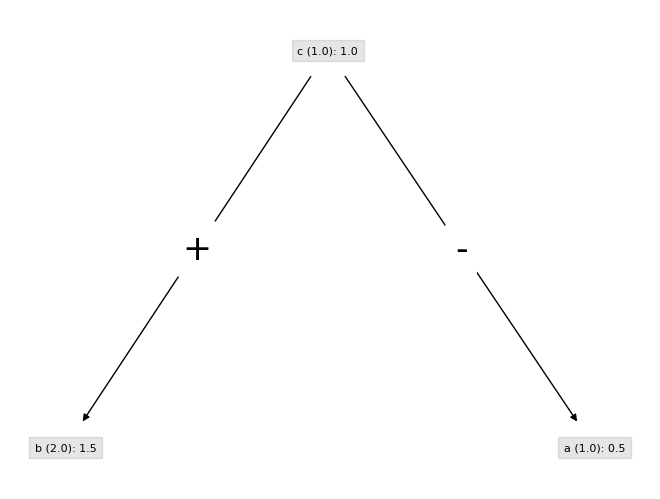

In [28]:
print("Initial QBAF:")
visualize(qbaf_initial, with_fs=True, round_to=6)

QBAF U_1:


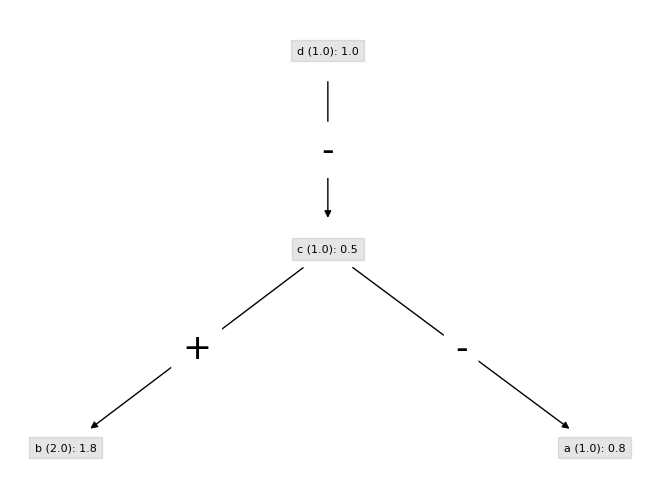

In [29]:
print("QBAF U_1:")
visualize(qbaf_u_1, with_fs=True, round_to=6)

QBAF U_2:


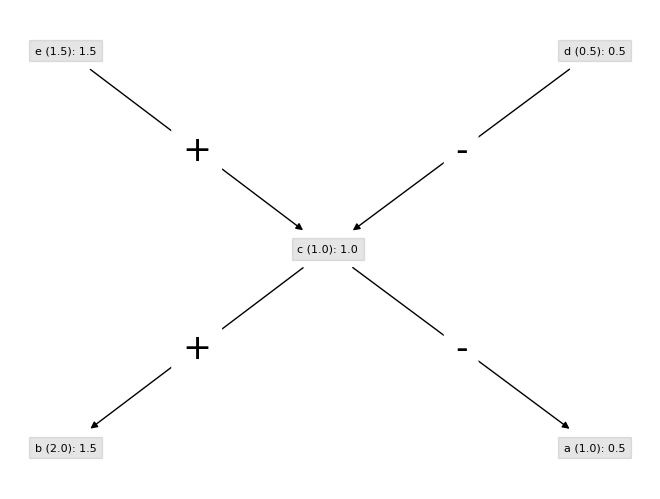

In [30]:
print("QBAF U_2:")
visualize(qbaf_u_2, with_fs=True, round_to=6)

QBAF U_3:


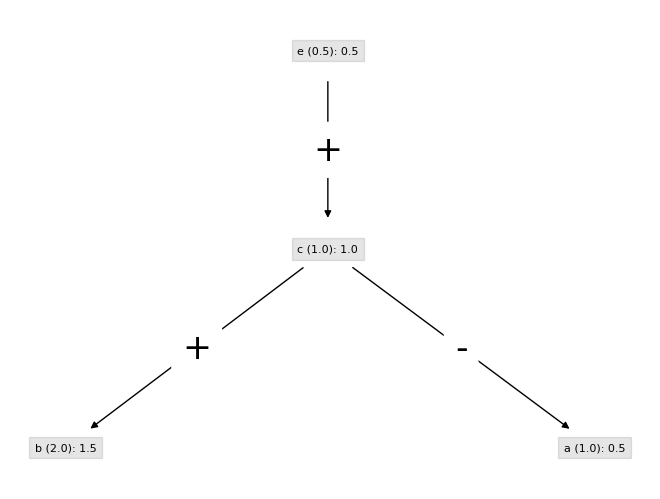

In [31]:
print("QBAF U_3:")
visualize(qbaf_u_3, with_fs=True, round_to=6)

## Robust Consistency

### 1. General Robust Consistent

`is_general_robust_consistent` accepts an initial QBAF, along with a QBAF collection, and topic arguments.
It returns `True` iff the topic arguments are strength-consistent over the collection w.r.t. the given semantics, and false otherwise.  


In [32]:
value_1 = is_general_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_1,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_2 = is_general_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_2,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

print(f'Is qbaf_initial general robust consistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial general robust consistent over qbaf_collection_2? {value_2}')

Is qbaf_initial general robust consistent over qbaf_collection_1? True
Is qbaf_initial general robust consistent over qbaf_collection_2? True


### 2. Expansion Robust Consistent

Similarly, `is_expansion_robust_consistent` accepts an initial QBAF, a collection and topic arguments.
As oppossed to the previous case, it only checks for strength consistency w.r.t. to expansions of the initial QBAF (within the update collection).

In [33]:
value_1 = is_expansion_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_1,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_2 = is_expansion_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_2,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

print(f'Is qbaf_initial expansion robust consistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial expansion robust consistent over qbaf_collection_2? {value_2}')

Is qbaf_initial expansion robust consistent over qbaf_collection_1? True
Is qbaf_initial expansion robust consistent over qbaf_collection_2? True


### 3. Bounded Update Robust Consistent

Lastly, `is_bounded_update_robust_consistent` accepts any QBAF, a QBAF collection, a mutable set, a permissible range of change and topic arguments.
In this case, strength consistency is checked over (initial) strength changes.

In [34]:
value_1 = is_bounded_updates_robust_consistent(qbaf_initial,
                                      qbaf_updates = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.5,
                                      mutable_args = {'d'})

value_2 = is_bounded_updates_robust_consistent(qbaf_initial,
                                      qbaf_updates = [qbaf_initial],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.01,
                                      mutable_args = {'a'})


print(f'Is qbaf_initial strength-update robust consistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial strength-update robust consistent over qbaf_collection_2? {value_2}')

Is qbaf_initial strength-update robust consistent over qbaf_collection_1? True
Is qbaf_initial strength-update robust consistent over qbaf_collection_2? True


## Robust Inconsistency

Just like for its *consistent* counterpart, there are three inconsistency robustness notions.

### 1. General Inconsistency Robust Inconsistent.

First, `is_general_robust_inconsistent` accepts an initial QBAF, along with a QBAF collection, and topic arguments.
It returns `True` iff whenever the topic arguments are strength-consistent over the collection w.r.t. the given semantics, and false otherwise.  


In [35]:
value_1 = is_general_robust_inconsistent(qbaf_initial,
                                        qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                        topic_argument_1 = 'a',
                                        topic_argument_2 = 'b')

value_2 = is_general_robust_inconsistent(qbaf_initial,
                                        qbaf_collection = [qbaf_initial],
                                        topic_argument_1 = 'a',
                                        topic_argument_2 = 'b')

print(f'Is qbaf_initial robust inconsistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial robust inconsistent over qbaf_collection_2? {value_2}')

Is qbaf_initial robust inconsistent over qbaf_collection_1? False
Is qbaf_initial robust inconsistent over qbaf_collection_2? False


### 3. Expansion Inconsistency Robust Inconsistent.

`is_expansion_robust_inconsistent` accepts an initial QBAF, along with a QBAF collection, and topic arguments.
It returns `True` iff whenever there is a strength inconsistency for expansions, the inconsistency is preserved over expansions.
Otherwise, it returns `False`.

In [36]:
value_1 = is_expansion_robust_inconsistent(qbaf_initial,
                                      qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_2 = is_expansion_robust_consistent(qbaf_initial,
                                      qbaf_collection = [qbaf_initial],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

print(f'Is qbaf_initial expansion robust inconsistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial expansion robust inconsistent over qbaf_collection_2? {value_2}')

Is qbaf_initial expansion robust inconsistent over qbaf_collection_1? True
Is qbaf_initial expansion robust inconsistent over qbaf_collection_2? True


### 3. Bounded Update Robust Inconsistent.

`is_bounded_updates_robust_inconsistent` accepts an initial QBAF, along with a QBAF collection, a mutable set, a permissible range of updates and topic arguments.
It returns `True` iff whenever there is a strength inconsistency for some bounded update over the mutable set, and the inconsistency is preserved over further updates.
Otherwise, it returns `False` otherwise.

In [37]:
value_1 = is_bounded_updates_robust_inconsistent(qbaf_initial,
                                      qbaf_updates = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.01,
                                      mutable_args = {'d'})

value_2 = is_bounded_updates_robust_inconsistent(qbaf_initial,
                                      qbaf_updates = [qbaf_initial],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.1,
                                      mutable_args = {'a'})

print(f'Is qbaf_initial bounded update robust inconsistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial bounded update robust inconsistent over qbaf_collection_2? {value_2}')

Is qbaf_initial bounded update robust inconsistent over qbaf_collection_1? True
Is qbaf_initial bounded update robust inconsistent over qbaf_collection_2? False


## Explanations and Pockets of Consistency

### Pockets of Consistency

The `pockets_of_consistency` function accepts any QBAF, a collection w.r.t. it and topic arguments.
It returns the $\subseteq-$maximal sets of arguments where consistency is maintained, if the updates are contained within them.

In [38]:
value_1 = pockets_of_consistency(qbaf_initial,
                                     qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

value_2 = pockets_of_consistency(qbaf_initial,
                                     qbaf_collection = [qbaf_initial],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

print(f'The pockets of consistency for the first case:{value_1}')
print(f'The pockets of consistency for the second case:{value_2}')

[]
The pockets of consistency for the first case:[{'e', 'd'}]
The pockets of consistency for the second case:[]


### Explanantions for Robustness violations

`explanation_of_robustness_violation` builds upon `pockets_of_consistency`, accepting an initial QBAF, a collection of updates and topic arguments.
It returns the minimal change required outside a maximal-pocket to bring about strength inconsistency.

In [39]:
value_1 = explanation_of_robustness_violation(qbaf_initial,
                                     qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

value_2 = explanation_of_robustness_violation(qbaf_initial,
                                     qbaf_collection = [qbaf_initial],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

print(f'The explanations for the first case:{value_1}')
print(f'The explanations for the second case:{value_2}')

[]
The explanations for the first case:[({'e', 'd'}, set())]
The explanations for the second case:[]


##